In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
train = pd.read_csv('F:/Course/youtube/42. Sarimax/train.csv' ,parse_dates=['date'])
test = pd.read_csv('F:/Course/youtube/42. Sarimax/test.csv', parse_dates=['date'])
df = pd.concat([train,test],sort=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   id      45000 non-null   float64       
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
 4   store   958000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [5]:
df['tahun']=df['date'].dt.year
df.head()

,date,id,item,sales,store,tahun
0,2013-01-01,NaN,1,13.0,1,2013
1,2013-01-02,NaN,1,11.0,1,2013
2,2013-01-03,NaN,1,14.0,1,2013
3,2013-01-04,NaN,1,13.0,1,2013
4,2013-01-05,NaN,1,10.0,1,2013


In [6]:
df=df.loc[(df['tahun'] == 2016) & (df['store'] == 1) & (df['item'] == 1)]

In [7]:
df.shape

(366, 6)

In [8]:
df=df.drop(['id','item','store','tahun'], axis=1)

In [9]:
df.head()

,date,sales
1095,2016-01-01,21.0
1096,2016-01-02,13.0
1097,2016-01-03,12.0
1098,2016-01-04,12.0
1099,2016-01-05,12.0


In [10]:
df['acak'] = np.random.randint(5,30,size=366)
df.head()

,date,sales,acak
1095,2016-01-01,21.0,10
1096,2016-01-02,13.0,15
1097,2016-01-03,12.0,7
1098,2016-01-04,12.0,7
1099,2016-01-05,12.0,8


In [11]:
df.set_index('date', inplace=True)

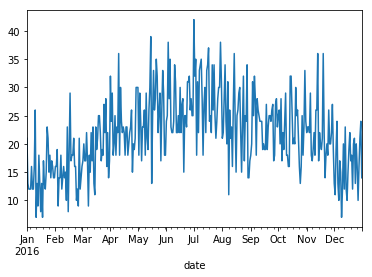

In [12]:
df['sales'].plot()

In [13]:
df.isnull().values.any()

False

In [14]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(df['sales'])
print('p-value:{}'.format(res[1]))

p-value:0.3914250398272302


In [15]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(df['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:8.367878477067533e-17


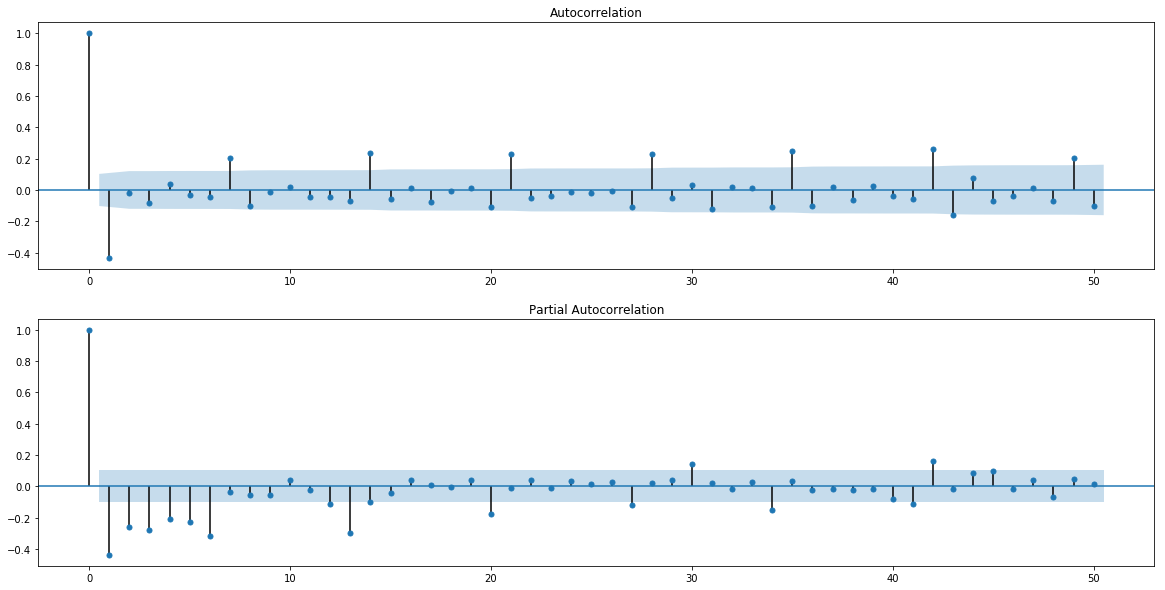

In [16]:
#acf pacf
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(df['sales'].diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df['sales'].diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [17]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelku=SARIMAX(df['sales'],order=(2,1,7),seasonal_order=(1,1,1,8),exog=df['acak'])

In [18]:
res=modelku.fit(disp=False)

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                  366
Model:             SARIMAX(2, 1, 7)x(1, 1, [1], 8)   Log Likelihood               -1117.457
Date:                             Sat, 02 Jan 2021   AIC                           2260.914
Time:                                     05:37:11   BIC                           2311.325
Sample:                                 01-01-2016   HQIC                          2280.965
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
acak          -0.0021      0.040     -0.052      0.958      -0.080       0.076
ar.L1         -0.3033      0.057     -5.299      0.000      -0.415      -0.191
ar.L2         -0.9063      0.056    -16.064      0.000      -1.017      -0.796
ma.L1         -0.5411      0.085     -6.362      0.000      -0.708      -0.374
ma.L2          0.5886      0.089      6.637      0.000       0.415       0.762
ma.L3         -0.9225      0.080    -11.603      0.000      -1.078      -0.767
ma.L4         -0.0016      0.082     -0.020      0.984      -0.163       0.160
ma.L5         -0.1147      0.070     -1.644      0.100      -0.252       0.022
ma.L6          0.1869      0.067      2.789      0.005       0.056       0.318
ma.L7          0.0463      0.068      0.682      0.495      -0.087       0.179
ar.S.L8       -0.0211      0.070     -0.302      0.763      -0.158       0.116
ma.S.L8       -0.9715      0.054    -17.994      0.000      -1.077      -0.866
sigma2        28.3921      2.453     11.572      0.000      23.583      33.201
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.85   Prob(JB):                         0.54
Heteroskedasticity (H):               1.15   Skew:                             0.14
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

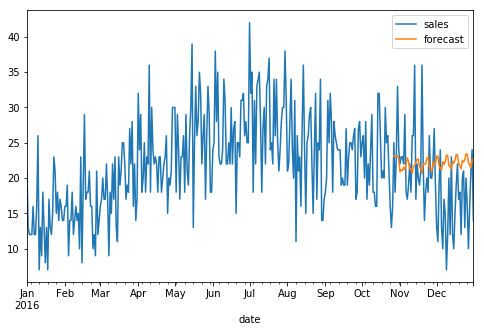

In [20]:
df['forecast']=res.predict(start=300,end=365,dynamic=True,exog=df['acak'])
df[['sales','forecast']].plot(figsize=(8,5))

In [21]:
df.tail()

,sales,acak,forecast
date,,,
2016-12-27,10.0,6,22.136525
2016-12-28,16.0,8,21.862668
2016-12-29,21.0,25,21.424262
2016-12-30,24.0,10,22.683104
2016-12-31,14.0,8,22.444287
